In [1]:
import matplotlib.pyplot as plt
import numpy as np
from openpyxl import load_workbook
from scipy.optimize import curve_fit
import pandas as pd

In [2]:
wb = load_workbook("/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Mac/2023_Fall/MMAE 419/5. Fracture/Fracture_BB_F2023.xlsx")

In [3]:
fig_path = "/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Mac/2023_Fall/MMAE 419/5. Fracture/figures/"

In [4]:
def line(x,a,b):
    return a*x+b
def ori_line(x,a):
    return a*x

In [5]:
def line(x,a,b):
    return a*x + b
def ori_line(x, a):
    return a*x

TYPE I !!!

a_avg = 0.96556

=== Validity Check : Crack length measurements ===
a / a_avg = [0.97166411 1.02251543 1.00946601 1.01671569 0.97963876] - not exceeed 10% of average
a / W = [0.47004008 0.49463928 0.48832665 0.49183367 0.4738978 ] - in range 0.45 - 0.55

=== Validity Check : Kq = Kic ??? ===
Pmax/Pq = 1.2768564778225193 < 1.1 ??
w-a >= 2.5(Kq/Sy)^2 : 1.03044 >= 1.1980801120215467 ??

=== Values to Record ===
Pmax = 12602.71283
Pq = 9870.109169584957
P5 = 9870.109169584957
Kq = 64380.72658451241


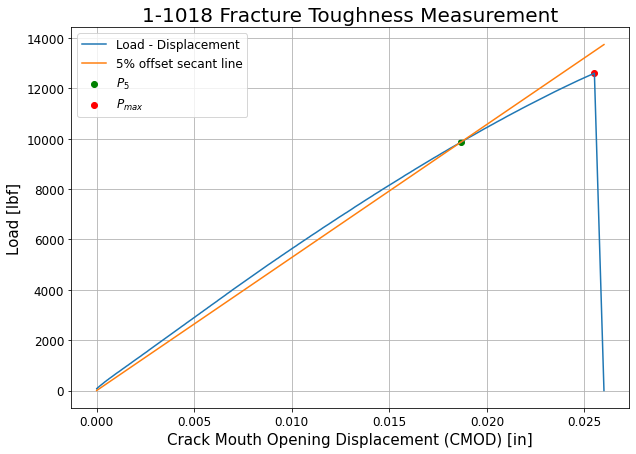

In [6]:
name = '1-1018'
ws = wb[name]

# Loading Data
d = np.array([ws.cell(i, 1).value for i in range(11, ws.max_row+1)], dtype = 'float64') # inch
p = np.array([ws.cell(i, 2).value for i in range(11, ws.max_row+1)], dtype = 'float64') # lbf
b = float(ws.cell(2,2).value) # thickness, inch
w = float(ws.cell(3,2).value) # inch
rate = float(ws.cell(4,2).value) # in/min
Sy = float(ws.cell(5,2).value)*1000 # psi

a = np.array([ws.cell(i,6).value for i in range(2,7)], dtype = 'float64') # five measurements of a (0t, 0.25t, 0.5t, 0.75t, 1t)

a_avg = np.mean(a)
a_div_avg = a/a_avg # between any two of the three crack length measurements must not exceeed 10% of average
a_div_w = a/w # must be in range(0.45 - 0.55)

plt.figure(figsize = (10,7))
plt.title(name + " Fracture Toughness Measurement", fontsize = 20)

# Finding Pq
plt.plot(d, p, label = "Load - Displacement")

# 5% offset line
linear_region = len(d)//2
pars, _ = curve_fit(f = line, xdata = d[:linear_region], ydata = p[:linear_region])
slope = pars[0] * 0.95
plt.plot(d, ori_line(d, slope), label = '5% offset secant line')

for i in range(len(d) - 1):
    if (p[i] - line(d[i],slope,0)) * (p[i+1] - line(d[i+1],slope,0)) < 0:
        func1 = np.poly1d(np.polyfit(d[i:i+2], p[i:i+2], len(d[i:i+2]) - 1))
        func2 = np.poly1d(np.polyfit(d[i:i+2], ori_line(d[i:i+2],slope), len(d[i:i+2]) - 1))

        # Find intersection points (roots of the subtracted functions)
        P5_d = np.roots(func1 - func2)
        P5 = func1(P5_d)[0]
        
plt.scatter(P5_d, P5, c = 'green', label = '$P_5$')


# Pmax = Pq (type III)
Pmax_idx = np.argmax(p)
Pmax_d = d[Pmax_idx]
Pmax = p[Pmax_idx]

if Pmax_d > P5_d:
    print("TYPE I !!!")
    Pq = P5
elif False:
    print("TYPE II !!!")
    pass
else:
    print("TYPE III!!!")
    Pq = Pmax


plt.scatter(Pmax_d, Pmax, c = 'r', label = '$P_{max}$')

# Obtaining Kq
alpha = a_avg/w
Kq = Pq/(b*np.sqrt(w)) * (2+alpha)/((1-alpha)**1.5) * (0.886 + 4.64*alpha - 13.32*alpha**2 + 14.72*alpha**3 - 5.6*alpha**4)
 # psi/in^2
    
plt.ylabel("Load [lbf]", fontsize = 15)
plt.xlabel("Crack Mouth Opening Displacement (CMOD) [in]", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.legend(fontsize = 12)

plt.savefig(fig_path + name + "plot")

print("\na_avg =",a_avg)
# Validity check
print("\n=== Validity Check : Crack length measurements ===")
print("a / a_avg = {} - not exceeed 10% of average".\
      format(a_div_avg))
print("a / W = {} - in range 0.45 - 0.55".\
      format(a_div_w))

print("\n=== Validity Check : Kq = Kic ??? ===")
print("Pmax/Pq = {} < 1.1 ??".format(Pmax/Pq))
print("w-a >= 2.5(Kq/Sy)^2 : {} >= {} ??".format(w-a_avg, 2.5*(Kq/Sy)**2))

# DATA to be calculated
print("\n=== Values to Record ===")
print("Pmax = {}\nPq = {}\nP5 = {}\nKq = {}".format(Pmax, Pq, P5, Kq))

df = pd.DataFrame(data = {name : [a, a_avg.round(3), a_div_avg.round(3), a_div_w.round(3)]}, index = ['a [inch]', 'a_avg', 'a / a_avg', 'a / W'], )
df2 = pd.DataFrame(data = {name : [b,w,Sy/1000]}, index = ["Thickness(B) [inch]", "Width(W) [inch]", "Yield Strength [ksi]"])

TYPE III!!!

a_avg = 0.9402799999999999

=== Validity Check : Crack length measurements ===
a / a_avg = [0.98481303 1.02001531 1.01427234 0.99544816 0.98545114] - not exceeed 10% of average
a / W = [0.46346346 0.48003003 0.47732733 0.46846847 0.46376376] - in range 0.45 - 0.55

=== Validity Check : Kq = Kic ??? ===
Pmax/Pq = 1.0 < 1.1 ??
w-a >= 2.5(Kq/Sy)^2 : 1.0577200000000002 >= 0.8067392907021892 ??

=== Values to Record ===
Pmax = 8601.98959
Pq = 8601.98959
P5 = 8499.745862059399
Kq = 52829.87081295291


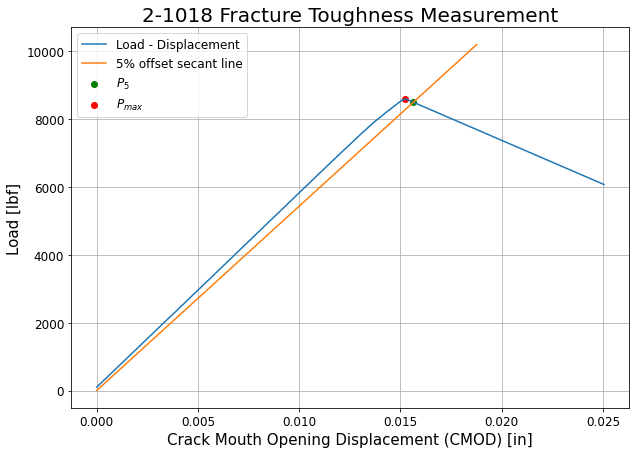

In [7]:
name = '2-1018'
ws = wb[name]

# Loading Data
d = np.array([ws.cell(i, 1).value for i in range(11, ws.max_row+1)], dtype = 'float64') # inch
p = np.array([ws.cell(i, 2).value for i in range(11, ws.max_row+1)], dtype = 'float64') # lbf
b = float(ws.cell(2,2).value) # thickness, inch
w = float(ws.cell(3,2).value) # inch
rate = float(ws.cell(4,2).value) # in/min
Sy = float(ws.cell(5,2).value)*1000 # psi

a = np.array([ws.cell(i,6).value for i in range(2,7)], dtype = 'float64') # five measurements of a (0t, 0.25t, 0.5t, 0.75t, 1t)
a_avg = np.mean(a)
a_div_avg = a/a_avg # between any two of the three crack length measurements must not exceeed 10% of average
a_div_w = a/w # must be in range(0.45 - 0.55)

plt.figure(figsize = (10,7))
plt.title(name + " Fracture Toughness Measurement", fontsize = 20)

# Finding Pq
plt.plot(d, p, label = "Load - Displacement")

# 5% offset line
linear_region = len(d)//2
pars, _ = curve_fit(f = line, xdata = d[:linear_region], ydata = p[:linear_region])
slope = pars[0] * 0.95

for i in range(len(d) - 1):
    if (p[i] - ori_line(d[i],slope)) * (p[i+1] - ori_line(d[i+1],slope)) < 0:
        func1 = np.poly1d(np.polyfit(d[i:i+2], p[i:i+2], len(d[i:i+2]) - 1))
        func2 = np.poly1d(np.polyfit(d[i:i+2], ori_line(d[i:i+2],slope), len(d[i:i+2]) - 1))

        # Find intersection points (roots of the subtracted functions)
        P5_d = np.roots(func1 - func2)
        P5 = func1(P5_d)[0]

offset_region = P5_d[0]*1.2

plt.plot([0, offset_region], ori_line(np.array([0, offset_region]), slope), label = '5% offset secant line')
plt.scatter(P5_d, P5, c = 'green', label = '$P_5$')


# Pmax = Pq (type III)
Pmax_idx = np.argmax(p)
Pmax_d = d[Pmax_idx]
Pmax = p[Pmax_idx]


if Pmax_d > P5_d:
    print("TYPE I !!!")
    Pq = P5
elif False:
    print("TYPE II !!!")
    pass
else:
    print("TYPE III!!!")
    Pq = Pmax

plt.scatter(Pmax_d, Pmax, c = 'r', label = '$P_{max}$')

# Obtaining Kq
alpha = a_avg/w
Kq = Pq/(b*np.sqrt(w)) * (2+alpha)/((1-alpha)**1.5) * (0.886 + 4.64*alpha - 13.32*alpha**2 + 14.72*alpha**3 - 5.6*alpha**4)
 # psi/in^2
    
plt.ylabel("Load [lbf]", fontsize = 15)
plt.xlabel("Crack Mouth Opening Displacement (CMOD) [in]", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.legend(fontsize = 12)

plt.savefig(fig_path + name + "plot")

print("\na_avg =",a_avg)
# Validity check
print("\n=== Validity Check : Crack length measurements ===")
print("a / a_avg = {} - not exceeed 10% of average".\
      format(a_div_avg))
print("a / W = {} - in range 0.45 - 0.55".\
      format(a_div_w))

print("\n=== Validity Check : Kq = Kic ??? ===")
print("Pmax/Pq = {} < 1.1 ??".format(Pmax/Pq))
print("w-a >= 2.5(Kq/Sy)^2 : {} >= {} ??".format(w-a_avg, 2.5*(Kq/Sy)**2))

# DATA to be calculated
print("\n=== Values to Record ===")
print("Pmax = {}\nPq = {}\nP5 = {}\nKq = {}".format(Pmax, Pq, P5, Kq))

df[name] = [a, a_avg.round(3), a_div_avg.round(3), a_div_w.round(3)]
df2[name] = [b,w,Sy/1000]

TYPE I !!!

a_avg = 0.98102

=== Validity Check : Crack length measurements ===
a / a_avg = [0.95563801 1.02974455 1.04921408 1.03198712 0.93341624] - not exceeed 10% of average
a / W = [0.46875 0.5051  0.51465 0.5062  0.45785] - in range 0.45 - 0.55

=== Validity Check : Kq = Kic ??? ===
Pmax/Pq = 1.0344755158092889 < 1.1 ??
w-a >= 2.5(Kq/Sy)^2 : 1.01898 >= 1.0828236551826431 ??

=== Values to Record ===
Pmax = 4820.08173
Pq = 4659.444961565053
P5 = 4659.444961565053
Kq = 30931.908795277788


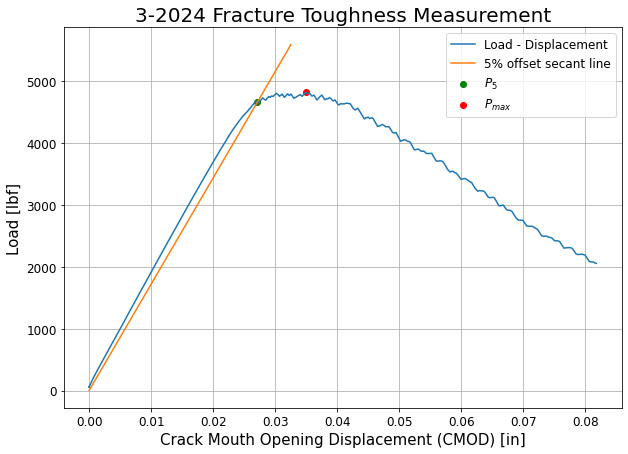

In [8]:
name = '3-2024'
ws = wb[name]

# Loading Data
d = np.array([ws.cell(i, 1).value for i in range(11, ws.max_row+1)], dtype = 'float64') # inch
p = np.array([ws.cell(i, 2).value for i in range(11, ws.max_row+1)], dtype = 'float64') # lbf
b = float(ws.cell(2,2).value) # thickness, inch
w = float(ws.cell(3,2).value) # inch
rate = float(ws.cell(4,2).value) # in/min
Sy = float(ws.cell(5,2).value)*1000 # psi

a = np.array([ws.cell(i,6).value for i in range(2,7)], dtype = 'float64') # five measurements of a (0t, 0.25t, 0.5t, 0.75t, 1t)
a_avg = np.mean(a)
a_div_avg = a/a_avg # between any two of the three crack length measurements must not exceeed 10% of average
a_div_w = a/w # must be in range(0.45 - 0.55)

plt.figure(figsize = (10,7))
plt.title(name + " Fracture Toughness Measurement", fontsize = 20)

# Finding Pq
plt.plot(d, p, label = "Load - Displacement")

# 5% offset line
linear_region = len(d)//2
pars, _ = curve_fit(f = line, xdata = d[:linear_region], ydata = p[:linear_region])
slope = pars[0] * 0.95

for i in range(len(d) - 1):
    if (p[i] - ori_line(d[i],slope)) * (p[i+1] - ori_line(d[i+1],slope)) < 0:
        func1 = np.poly1d(np.polyfit(d[i:i+2], p[i:i+2], len(d[i:i+2]) - 1))
        func2 = np.poly1d(np.polyfit(d[i:i+2], ori_line(d[i:i+2],slope), len(d[i:i+2]) - 1))

        # Find intersection points (roots of the subtracted functions)
        P5_d = np.roots(func1 - func2)
        P5 = func1(P5_d)[0]

offset_region = P5_d[0]*1.2

plt.plot([0, offset_region], ori_line(np.array([0, offset_region]), slope), label = '5% offset secant line')
plt.scatter(P5_d, P5, c = 'green', label = '$P_5$')


# Pmax = Pq (type III)
Pmax_idx = np.argmax(p)
Pmax_d = d[Pmax_idx]
Pmax = p[Pmax_idx]


if Pmax_d > P5_d:
    print("TYPE I !!!")
    Pq = P5
elif False:
    print("TYPE II !!!")
    pass
else:
    print("TYPE III!!!")
    Pq = Pmax
    
    
plt.scatter(Pmax_d, Pmax, c = 'r', label = '$P_{max}$')

# Obtaining Kq
alpha = a_avg/w
Kq = Pq/(b*np.sqrt(w)) * (2+alpha)/((1-alpha)**1.5) * (0.886 + 4.64*alpha - 13.32*alpha**2 + 14.72*alpha**3 - 5.6*alpha**4)
 # psi/in^2
    
plt.ylabel("Load [lbf]", fontsize = 15)
plt.xlabel("Crack Mouth Opening Displacement (CMOD) [in]", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.legend(fontsize = 12)

plt.savefig(fig_path + name + "plot")


print("\na_avg =",a_avg)
# Validity check
print("\n=== Validity Check : Crack length measurements ===")
print("a / a_avg = {} - not exceeed 10% of average".\
      format(a_div_avg))
print("a / W = {} - in range 0.45 - 0.55".\
      format(a_div_w))

print("\n=== Validity Check : Kq = Kic ??? ===")
print("Pmax/Pq = {} < 1.1 ??".format(Pmax/Pq))
print("w-a >= 2.5(Kq/Sy)^2 : {} >= {} ??".format(w-a_avg, 2.5*(Kq/Sy)**2))

# DATA to be calculated
print("\n=== Values to Record ===")
print("Pmax = {}\nPq = {}\nP5 = {}\nKq = {}".format(Pmax, Pq, P5, Kq))

df[name] = [a, a_avg.round(3), a_div_avg.round(3), a_div_w.round(3)]
df2[name] = [b,w,Sy/1000]

TYPE I !!!

a_avg = 1.50788

=== Validity Check : Crack length measurements ===
a / a_avg = [0.93210335 1.04099796 1.07143805 1.04517601 0.91028464] - not exceeed 10% of average
a / W = [0.46678844 0.52132182 0.53656592 0.52341415 0.45586184] - in range 0.45 - 0.55

=== Validity Check : Kq = Kic ??? ===
Pmax/Pq = 1.0727621303328472 < 1.1 ??
w-a >= 2.5(Kq/Sy)^2 : 1.50312 >= 0.7857582397994936 ??

=== Values to Record ===
Pmax = 7613.72141
Pq = 7097.306285073357
P5 = 7097.306285073357
Kq = 26349.49678242134


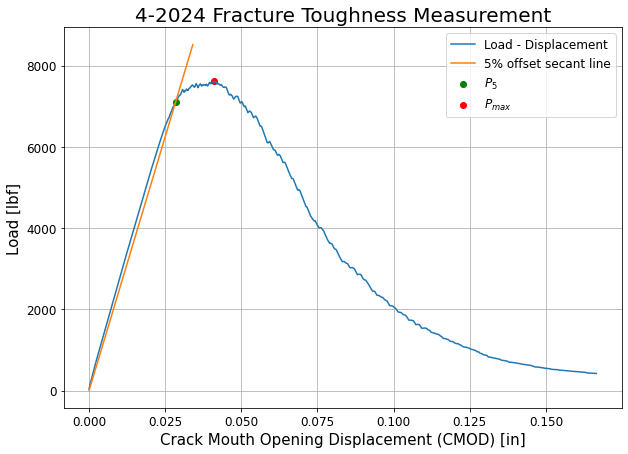

In [9]:
name = '4-2024'
ws = wb[name]

# Loading Data
d = np.array([ws.cell(i, 1).value for i in range(11, ws.max_row-100)], dtype = 'float64') # inch
p = np.array([ws.cell(i, 2).value for i in range(11, ws.max_row-100)], dtype = 'float64') # lbf
b = float(ws.cell(2,2).value) # thickness, inch
w = float(ws.cell(3,2).value) # inch
rate = float(ws.cell(4,2).value) # in/min
Sy = float(ws.cell(5,2).value)*1000 # psi

a = np.array([ws.cell(i,6).value for i in range(2,7)], dtype = 'float64') # five measurements of a (0t, 0.25t, 0.5t, 0.75t, 1t)
a_avg = np.mean(a)
a_div_avg = a/a_avg # between any two of the three crack length measurements must not exceeed 10% of average
a_div_w = a/w # must be in range(0.45 - 0.55)

plt.figure(figsize = (10,7))
plt.title(name + " Fracture Toughness Measurement", fontsize = 20)

# Finding Pq
plt.plot(d, p, label = "Load - Displacement")

# 5% offset line
linear_region = len(d)//3
pars, _ = curve_fit(f = line, xdata = d[:linear_region], ydata = p[:linear_region])
slope = pars[0] * 0.95

for i in range(len(d) - 1):
    if (p[i] - ori_line(d[i],slope)) * (p[i+1] - ori_line(d[i+1],slope)) < 0:
        func1 = np.poly1d(np.polyfit(d[i:i+2], p[i:i+2], len(d[i:i+2]) - 1))
        func2 = np.poly1d(np.polyfit(d[i:i+2], ori_line(d[i:i+2],slope), len(d[i:i+2]) - 1))

        # Find intersection points (roots of the subtracted functions)
        P5_d = np.roots(func1 - func2)
        P5 = func1(P5_d)[0]

offset_region = P5_d[0]*1.2

plt.plot([0, offset_region], ori_line(np.array([0, offset_region]), slope), label = '5% offset secant line')
plt.scatter(P5_d, P5, c = 'green', label = '$P_5$')


# Pmax = Pq (type III)
Pmax_idx = np.argmax(p)
Pmax_d = d[Pmax_idx]
Pmax = p[Pmax_idx]

if Pmax_d > P5_d:
    print("TYPE I !!!")
    Pq = P5
elif False:
    print("TYPE II !!!")
    pass
else:
    print("TYPE III!!!")
    Pq = Pmax

plt.scatter(Pmax_d, Pmax, c = 'r', label = '$P_{max}$')

# Obtaining Kq
alpha = a_avg/w
Kq = Pq/(b*np.sqrt(w)) * (2+alpha)/((1-alpha)**1.5) * (0.886 + 4.64*alpha - 13.32*alpha**2 + 14.72*alpha**3 - 5.6*alpha**4)
 # psi/in^2
    
plt.ylabel("Load [lbf]", fontsize = 15)
plt.xlabel("Crack Mouth Opening Displacement (CMOD) [in]", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.legend(fontsize = 12)

plt.savefig(fig_path + name + "plot")


print("\na_avg =",a_avg)
# Validity check
print("\n=== Validity Check : Crack length measurements ===")
print("a / a_avg = {} - not exceeed 10% of average".\
      format(a_div_avg))
print("a / W = {} - in range 0.45 - 0.55".\
      format(a_div_w))

print("\n=== Validity Check : Kq = Kic ??? ===")
print("Pmax/Pq = {} < 1.1 ??".format(Pmax/Pq))
print("w-a >= 2.5(Kq/Sy)^2 : {} >= {} ??".format(w-a_avg, 2.5*(Kq/Sy)**2))

# DATA to be calculated
print("\n=== Values to Record ===")
print("Pmax = {}\nPq = {}\nP5 = {}\nKq = {}".format(Pmax, Pq, P5, Kq))

df[name] = [a, a_avg.round(3), a_div_avg.round(3), a_div_w.round(3)]
df2[name] = [b,w,Sy/1000]

TYPE I !!!

a_avg = 1.41234

=== Validity Check : Crack length measurements ===
a / a_avg = [0.97164989 1.01250407 1.02022176 1.01746038 0.9781639 ] - not exceeed 10% of average
a / W = [0.45789122 0.47714381 0.48078078 0.47947948 0.46096096] - in range 0.45 - 0.55

=== Validity Check : Kq = Kic ??? ===
Pmax/Pq = 1.147201746204933 < 1.1 ??
w-a >= 2.5(Kq/Sy)^2 : 1.58466 >= 1.5019904997184437 ??

=== Values to Record ===
Pmax = 10484.14682
Pq = 9138.88673433656
P5 = 9138.88673433656
Kq = 31004.41774682769


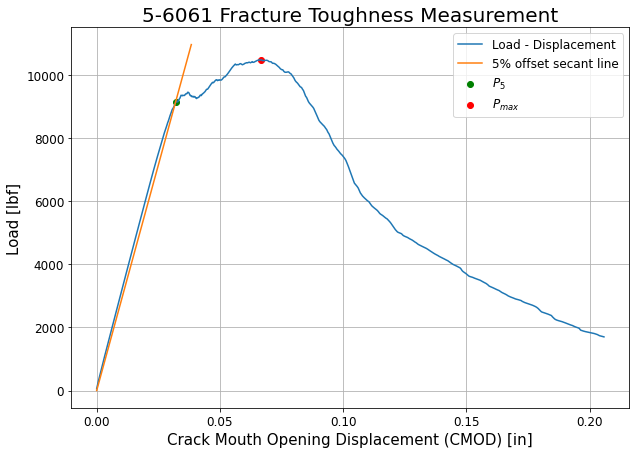

In [10]:
name = '5-6061'
ws = wb[name]

# Loading Data
d = np.array([ws.cell(i, 1).value for i in range(11, ws.max_row+1)], dtype = 'float64') # inch
p = np.array([ws.cell(i, 2).value for i in range(11, ws.max_row+1)], dtype = 'float64') # lbf
b = float(ws.cell(2,2).value) # thickness, inch
w = float(ws.cell(3,2).value) # inch
rate = float(ws.cell(4,2).value) # in/min
Sy = float(ws.cell(5,2).value)*1000 # psi

a = np.array([ws.cell(i,6).value for i in range(2,7)], dtype = 'float64') # five measurements of a (0t, 0.25t, 0.5t, 0.75t, 1t)
a_avg = np.mean(a)
a_div_avg = a/a_avg # between any two of the three crack length measurements must not exceeed 10% of average
a_div_w = a/w # must be in range(0.45 - 0.55)

plt.figure(figsize = (10,7))
plt.title(name + " Fracture Toughness Measurement", fontsize = 20)

# Finding Pq
plt.plot(d, p, label = "Load - Displacement")

# 5% offset line
linear_region = len(d)//4
pars, _ = curve_fit(f = line, xdata = d[:linear_region], ydata = p[:linear_region])
slope = pars[0] * 0.95

for i in range(len(d) - 1):
    if (p[i] - ori_line(d[i],slope)) * (p[i+1] - ori_line(d[i+1],slope)) < 0:
        func1 = np.poly1d(np.polyfit(d[i:i+2], p[i:i+2], len(d[i:i+2]) - 1))
        func2 = np.poly1d(np.polyfit(d[i:i+2], ori_line(d[i:i+2],slope), len(d[i:i+2]) - 1))

        # Find intersection points (roots of the subtracted functions)
        P5_d = np.roots(func1 - func2)
        P5 = func1(P5_d)[0]

offset_region = P5_d[0]*1.2

plt.plot([0, offset_region], ori_line(np.array([0, offset_region]), slope), label = '5% offset secant line')
plt.scatter(P5_d, P5, c = 'green', label = '$P_5$')


# Pmax = Pq (type III)
Pmax_idx = np.argmax(p)
Pmax_d = d[Pmax_idx]
Pmax = p[Pmax_idx]


if Pmax_d > P5_d:
    print("TYPE I !!!")
    Pq = P5
elif False:
    print("TYPE II !!!")
    pass
else:
    print("TYPE III!!!")
    Pq = Pmax

plt.scatter(Pmax_d, Pmax, c = 'r', label = '$P_{max}$')

# Obtaining Kq
alpha = a_avg/w
Kq = Pq/(b*np.sqrt(w)) * (2+alpha)/((1-alpha)**1.5) * (0.886 + 4.64*alpha - 13.32*alpha**2 + 14.72*alpha**3 - 5.6*alpha**4)
 # psi/in^2
    
plt.ylabel("Load [lbf]", fontsize = 15)
plt.xlabel("Crack Mouth Opening Displacement (CMOD) [in]", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.legend(fontsize = 12)

plt.savefig(fig_path + name + "plot")


print("\na_avg =",a_avg)
# Validity check
print("\n=== Validity Check : Crack length measurements ===")
print("a / a_avg = {} - not exceeed 10% of average".\
      format(a_div_avg))
print("a / W = {} - in range 0.45 - 0.55".\
      format(a_div_w))

print("\n=== Validity Check : Kq = Kic ??? ===")
print("Pmax/Pq = {} < 1.1 ??".format(Pmax/Pq))
print("w-a >= 2.5(Kq/Sy)^2 : {} >= {} ??".format(w-a_avg, 2.5*(Kq/Sy)**2))

# DATA to be calculated
print("\n=== Values to Record ===")
print("Pmax = {}\nPq = {}\nP5 = {}\nKq = {}".format(Pmax, Pq, P5, Kq))

df[name] = [a, a_avg.round(3), a_div_avg.round(3), a_div_w.round(3)]
df2[name] = [b,w,Sy/1000]

TYPE I !!!

a_avg = 0.9840599999999998

=== Validity Check : Crack length measurements ===
a / a_avg = [0.9582749  1.02656342 1.04150153 1.02727476 0.94638538] - not exceeed 10% of average
a / W = [0.46833871 0.50171343 0.50901415 0.50206109 0.46252794] - in range 0.45 - 0.55

=== Validity Check : Kq = Kic ??? ===
Pmax/Pq = 1.148259300078974 < 1.1 ??
w-a >= 2.5(Kq/Sy)^2 : 1.0294400000000001 >= 1.4183134225970746 ??

=== Values to Record ===
Pmax = 5307.96622
Pq = 4622.6198382498915
P5 = 4622.6198382498915
Kq = 30128.401724321982


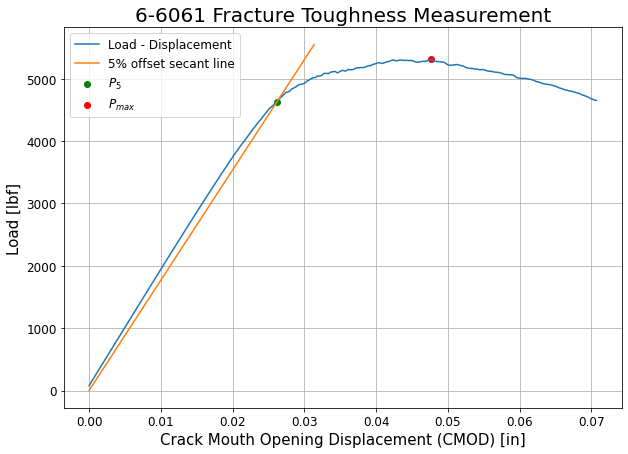

In [11]:
name = '6-6061'
ws = wb[name]

# Loading Data
d = np.array([ws.cell(i, 1).value for i in range(11, ws.max_row+1)], dtype = 'float64') # inch
p = np.array([ws.cell(i, 2).value for i in range(11, ws.max_row+1)], dtype = 'float64') # lbf
b = float(ws.cell(2,2).value) # thickness, inch
w = float(ws.cell(3,2).value) # inch
rate = float(ws.cell(4,2).value) # in/min
Sy = float(ws.cell(5,2).value)*1000 # psi

a = np.array([ws.cell(i,6).value for i in range(2,7)], dtype = 'float64') # five measurements of a (0t, 0.25t, 0.5t, 0.75t, 1t)
a_avg = np.mean(a)
a_div_avg = a/a_avg # between any two of the three crack length measurements must not exceeed 10% of average
a_div_w = a/w # must be in range(0.45 - 0.55)

plt.figure(figsize = (10,7))
plt.title(name + " Fracture Toughness Measurement", fontsize = 20)

# Finding Pq
plt.plot(d, p, label = "Load - Displacement")

# 5% offset line
linear_region = len(d)//3
pars, _ = curve_fit(f = line, xdata = d[:linear_region], ydata = p[:linear_region])
slope = pars[0] * 0.95

for i in range(len(d) - 1):
    if (p[i] - ori_line(d[i],slope)) * (p[i+1] - ori_line(d[i+1],slope)) < 0:
        func1 = np.poly1d(np.polyfit(d[i:i+2], p[i:i+2], len(d[i:i+2]) - 1))
        func2 = np.poly1d(np.polyfit(d[i:i+2], ori_line(d[i:i+2],slope), len(d[i:i+2]) - 1))

        # Find intersection points (roots of the subtracted functions)
        P5_d = np.roots(func1 - func2)
        P5 = func1(P5_d)[0]

offset_region = P5_d[0]*1.2

plt.plot([0, offset_region], ori_line(np.array([0, offset_region]), slope), label = '5% offset secant line')
plt.scatter(P5_d, P5, c = 'green', label = '$P_5$')


# Pmax = Pq (type III)
Pmax_idx = np.argmax(p)
Pmax_d = d[Pmax_idx]
Pmax = p[Pmax_idx]

if Pmax_d > P5_d:
    print("TYPE I !!!")
    Pq = P5
elif False:
    print("TYPE II !!!")
    pass
else:
    print("TYPE III!!!")
    Pq = Pmax

plt.scatter(Pmax_d, Pmax, c = 'r', label = '$P_{max}$')

# Obtaining Kq
alpha = a_avg/w
Kq = Pq/(b*np.sqrt(w)) * (2+alpha)/((1-alpha)**1.5) * (0.886 + 4.64*alpha - 13.32*alpha**2 + 14.72*alpha**3 - 5.6*alpha**4)
 # psi/in^2
    
plt.ylabel("Load [lbf]", fontsize = 15)
plt.xlabel("Crack Mouth Opening Displacement (CMOD) [in]", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.legend(fontsize = 12)
plt.savefig(fig_path + name + "plot")


print("\na_avg =",a_avg)
# Validity check
print("\n=== Validity Check : Crack length measurements ===")
print("a / a_avg = {} - not exceeed 10% of average".\
      format(a_div_avg))
print("a / W = {} - in range 0.45 - 0.55".\
      format(a_div_w))

print("\n=== Validity Check : Kq = Kic ??? ===")
print("Pmax/Pq = {} < 1.1 ??".format(Pmax/Pq))
print("w-a >= 2.5(Kq/Sy)^2 : {} >= {} ??".format(w-a_avg, 2.5*(Kq/Sy)**2))

# DATA to be calculated
print("\n=== Values to Record ===")
print("Pmax = {}\nPq = {}\nP5 = {}\nKq = {}".format(Pmax, Pq, P5, Kq))

df[name] = [a, a_avg.round(3), a_div_avg.round(3), a_div_w.round(3)]
df2[name] = [b,w,Sy/1000]

TYPE I !!!

a_avg = 1.47662

=== Validity Check : Crack length measurements ===
a / a_avg = [0.95806639 1.01928729 1.03371213 1.02111579 0.9678184 ] - not exceeed 10% of average
a / W = [0.47140953 0.50153282 0.50863046 0.50243252 0.47620793] - in range 0.45 - 0.55

=== Validity Check : Kq = Kic ??? ===
Pmax/Pq = 1.0108533625844796 < 1.1 ??
w-a >= 2.5(Kq/Sy)^2 : 1.5243799999999998 >= 0.19234346551617212 ??

=== Values to Record ===
Pmax = 5638.07277
Pq = 5577.537730680311
P5 = 5577.537730680311
Kq = 20248.44021386024


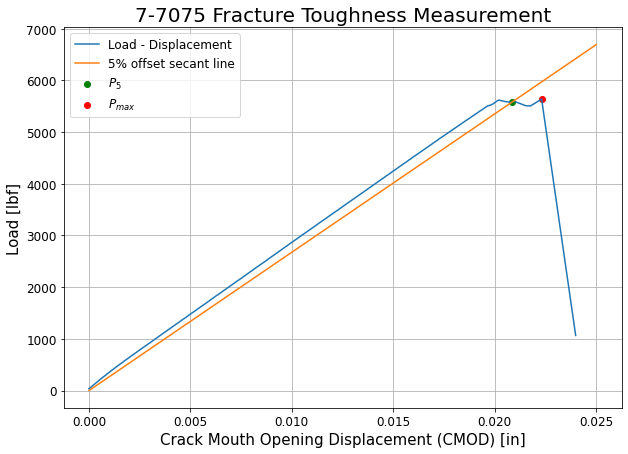

In [12]:
name = '7-7075'
ws = wb[name]

# Loading Data
d = np.array([ws.cell(i, 1).value for i in range(11, ws.max_row+1)], dtype = 'float64') # inch
p = np.array([ws.cell(i, 2).value for i in range(11, ws.max_row+1)], dtype = 'float64') # lbf
b = float(ws.cell(2,2).value) # thickness, inch
w = float(ws.cell(3,2).value) # inch
rate = float(ws.cell(4,2).value) # in/min
Sy = float(ws.cell(5,2).value)*1000 # psi

a = np.array([ws.cell(i,6).value for i in range(2,7)], dtype = 'float64') # five measurements of a (0t, 0.25t, 0.5t, 0.75t, 1t)
a_avg = np.mean(a)
a_div_avg = a/a_avg # between any two of the three crack length measurements must not exceeed 10% of average
a_div_w = a/w # must be in range(0.45 - 0.55)

plt.figure(figsize = (10,7))
plt.title(name + " Fracture Toughness Measurement", fontsize = 20)

# Finding Pq
plt.plot(d, p, label = "Load - Displacement")

# 5% offset line
linear_region = len(d)//2
pars, _ = curve_fit(f = line, xdata = d[:linear_region], ydata = p[:linear_region])
slope = pars[0] * 0.95

for i in range(len(d) - 1):
    if (p[i] - ori_line(d[i],slope)) * (p[i+1] - ori_line(d[i+1],slope)) < 0:
        func1 = np.poly1d(np.polyfit(d[i:i+2], p[i:i+2], len(d[i:i+2]) - 1))
        func2 = np.poly1d(np.polyfit(d[i:i+2], ori_line(d[i:i+2],slope), len(d[i:i+2]) - 1))

        # Find intersection points (roots of the subtracted functions)
        P5_d = np.roots(func1 - func2)
        P5 = func1(P5_d)[0]

offset_region = P5_d[0]*1.2

plt.plot([0, offset_region], ori_line(np.array([0, offset_region]), slope), label = '5% offset secant line')
plt.scatter(P5_d, P5, c = 'green', label = '$P_5$')


# Pmax = Pq (type III)
Pmax_idx = np.argmax(p)
Pmax_d = d[Pmax_idx]
Pmax = p[Pmax_idx]


if Pmax_d > P5_d:
    print("TYPE I !!!")
    Pq = P5
elif False:
    print("TYPE II !!!")
    pass
else:
    print("TYPE III!!!")
    Pq = Pmax


plt.scatter(Pmax_d, Pmax, c = 'r', label = '$P_{max}$')

# Obtaining Kq
alpha = a_avg/w
Kq = Pq/(b*np.sqrt(w)) * (2+alpha)/((1-alpha)**1.5) * (0.886 + 4.64*alpha - 13.32*alpha**2 + 14.72*alpha**3 - 5.6*alpha**4)
 # psi/in^2
    
plt.ylabel("Load [lbf]", fontsize = 15)
plt.xlabel("Crack Mouth Opening Displacement (CMOD) [in]", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.legend(fontsize = 12)

plt.savefig(fig_path + name + "plot")

print("\na_avg =",a_avg)
# Validity check
print("\n=== Validity Check : Crack length measurements ===")
print("a / a_avg = {} - not exceeed 10% of average".\
      format(a_div_avg))
print("a / W = {} - in range 0.45 - 0.55".\
      format(a_div_w))

print("\n=== Validity Check : Kq = Kic ??? ===")
print("Pmax/Pq = {} < 1.1 ??".format(Pmax/Pq))
print("w-a >= 2.5(Kq/Sy)^2 : {} >= {} ??".format(w-a_avg, 2.5*(Kq/Sy)**2))

# DATA to be calculated
print("\n=== Values to Record ===")
print("Pmax = {}\nPq = {}\nP5 = {}\nKq = {}".format(Pmax, Pq, P5, Kq))

df[name] = [a, a_avg.round(3), a_div_avg.round(3), a_div_w.round(3)]
df2[name] = [b,w,Sy/1000]

TYPE III!!!

a_avg = 1.44174

=== Validity Check : Crack length measurements ===
a / a_avg = [0.96702595 1.02216766 1.03499938 1.01918515 0.95662186] - not exceeed 10% of average
a / W = [0.46473333 0.49123333 0.4974     0.4898     0.45973333] - in range 0.45 - 0.55

=== Validity Check : Kq = Kic ??? ===
Pmax/Pq = 1.0 < 1.1 ??
w-a >= 2.5(Kq/Sy)^2 : 1.55826 >= 0.19179795326158733 ??

=== Values to Record ===
Pmax = 5767.10811
Pq = 5767.10811
P5 = 5678.694362683469
Kq = 20219.70615939805


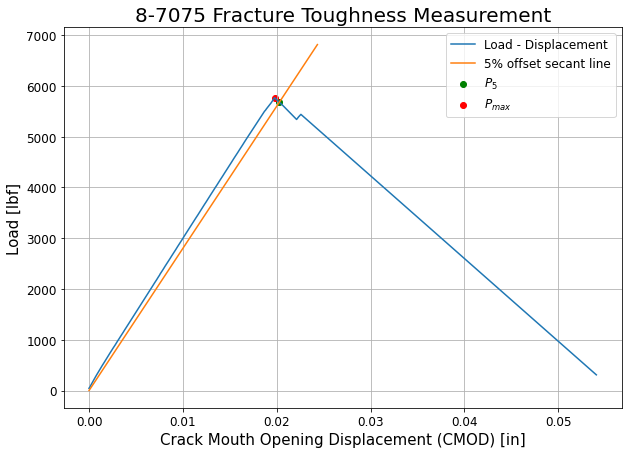

In [13]:
name = '8-7075'
ws = wb[name]

# Loading Data
d = np.array([ws.cell(i, 1).value for i in range(11, ws.max_row+1)], dtype = 'float64') # inch
p = np.array([ws.cell(i, 2).value for i in range(11, ws.max_row+1)], dtype = 'float64') # lbf
b = float(ws.cell(2,2).value) # thickness, inch
w = float(ws.cell(3,2).value) # inch
rate = float(ws.cell(4,2).value) # in/min
Sy = float(ws.cell(5,2).value)*1000 # psi

a = np.array([ws.cell(i,6).value for i in range(2,7)], dtype = 'float64') # five measurements of a (0t, 0.25t, 0.5t, 0.75t, 1t)
a_avg = np.mean(a)
a_div_avg = a/a_avg # between any two of the three crack length measurements must not exceeed 10% of average
a_div_w = a/w # must be in range(0.45 - 0.55)

plt.figure(figsize = (10,7))
plt.title(name + " Fracture Toughness Measurement", fontsize = 20)

# Finding Pq
plt.plot(d, p, label = "Load - Displacement")

# 5% offset line
linear_region = len(d)//2
pars, _ = curve_fit(f = line, xdata = d[:linear_region], ydata = p[:linear_region])
slope = pars[0] * 0.95

for i in range(len(d) - 1):
    if (p[i] - ori_line(d[i],slope)) * (p[i+1] - ori_line(d[i+1],slope)) < 0:
        func1 = np.poly1d(np.polyfit(d[i:i+2], p[i:i+2], len(d[i:i+2]) - 1))
        func2 = np.poly1d(np.polyfit(d[i:i+2], ori_line(d[i:i+2],slope), len(d[i:i+2]) - 1))

        # Find intersection points (roots of the subtracted functions)
        P5_d = np.roots(func1 - func2)
        P5 = func1(P5_d)[0]

offset_region = P5_d[0]*1.2

plt.plot([0, offset_region], ori_line(np.array([0, offset_region]), slope), label = '5% offset secant line')
plt.scatter(P5_d, P5, c = 'green', label = '$P_5$')


# Pmax = Pq (type III)
Pmax_idx = np.argmax(p)
Pmax_d = d[Pmax_idx]
Pmax = p[Pmax_idx]


if Pmax_d > P5_d:
    print("TYPE I !!!")
    Pq = P5
elif False:
    print("TYPE II !!!")
    pass
else:
    print("TYPE III!!!")
    Pq = Pmax

plt.scatter(Pmax_d, Pmax, c = 'r', label = '$P_{max}$')

# Obtaining Kq
alpha = a_avg/w
Kq = Pq/(b*np.sqrt(w)) * (2+alpha)/((1-alpha)**1.5) * (0.886 + 4.64*alpha - 13.32*alpha**2 + 14.72*alpha**3 - 5.6*alpha**4)
 # psi/in^2
    
plt.ylabel("Load [lbf]", fontsize = 15)
plt.xlabel("Crack Mouth Opening Displacement (CMOD) [in]", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.grid()
plt.legend(fontsize = 12)

plt.savefig(fig_path + name + "plot")


print("\na_avg =",a_avg)
# Validity check
print("\n=== Validity Check : Crack length measurements ===")
print("a / a_avg = {} - not exceeed 10% of average".\
      format(a_div_avg))
print("a / W = {} - in range 0.45 - 0.55".\
      format(a_div_w))

print("\n=== Validity Check : Kq = Kic ??? ===")
print("Pmax/Pq = {} < 1.1 ??".format(Pmax/Pq))
print("w-a >= 2.5(Kq/Sy)^2 : {} >= {} ??".format(w-a_avg, 2.5*(Kq/Sy)**2))

# DATA to be calculated
print("\n=== Values to Record ===")
print("Pmax = {}\nPq = {}\nP5 = {}\nKq = {}".format(Pmax, Pq, P5, Kq))

df[name] = [a, a_avg.round(3), a_div_avg.round(3), a_div_w.round(3)]
df2[name] = [b,w,Sy/1000]

In [14]:
df.to_excel("/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Mac/2023_Fall/MMAE 419/5. Fracture/a validity.xlsx")

In [15]:
df2.to_excel("/Users/kunwoosmac/Library/Mobile Documents/com~apple~CloudDocs/Mac/2023_Fall/MMAE 419/5. Fracture/dimensions.xlsx")